**Description**: Analyze Mistral-7B zero-shot accuracies for $n = 100$.

**Estimated runtime**: 20 min.

In [1]:
import os
import sys
from typing import Literal

import polars as pl
import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_zero_shot")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
accuracy_df.shape

(500, 8)

In [6]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

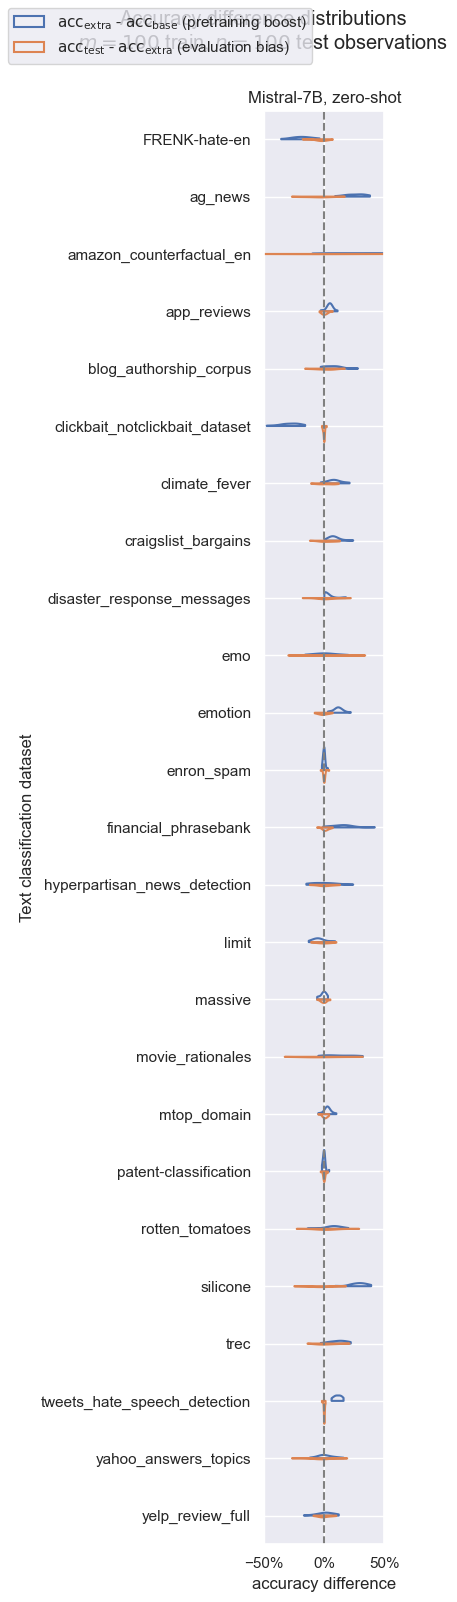

In [7]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train);

# Pretraining boost

In [8]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.05252 ┆ 0.024713 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.300832 ┆ 0.132237 │
└──────────┴──────────┘


In [9]:
with pl.Config(tbl_rows=-1):
    print(summary_boost)

┌────────────────────────────────┬─────────┬──────────┐
│ dataset                        ┆ mean    ┆ se       │
╞════════════════════════════════╪═════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.1835 ┆ 0.018242 │
│ ag_news                        ┆ 0.258   ┆ 0.017927 │
│ amazon_counterfactual_en       ┆ 0.266   ┆ 0.050676 │
│ app_reviews                    ┆ 0.0435  ┆ 0.006699 │
│ blog_authorship_corpus         ┆ 0.0635  ┆ 0.017325 │
│ clickbait_notclickbait_dataset ┆ -0.284  ┆ 0.017672 │
│ climate_fever                  ┆ 0.0805  ┆ 0.013659 │
│ craigslist_bargains            ┆ 0.085   ┆ 0.012129 │
│ disaster_response_messages     ┆ 0.0285  ┆ 0.012059 │
│ emo                            ┆ 0.004   ┆ 0.021733 │
│ emotion                        ┆ 0.1145  ┆ 0.009665 │
│ enron_spam                     ┆ -0.0015 ┆ 0.002325 │
│ financial_phrasebank           ┆ 0.1445  ┆ 0.021963 │
│ hyperpartisan_news_detection   ┆ 0.0     ┆ 0.023124 │
│ limit                          ┆ -0.0385 ┆ 0.0

In [10]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_boost)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.251598 ┆ 0.023442 │
│ ag_news                        ┆ 0.497903  ┆ 0.040516 │
│ amazon_counterfactual_en       ┆ 0.859316  ┆ 0.16823  │
│ app_reviews                    ┆ 0.0717    ┆ 0.011644 │
│ blog_authorship_corpus         ┆ 0.133513  ┆ 0.039791 │
│ clickbait_notclickbait_dataset ┆ -0.427017 ┆ 0.020319 │
│ climate_fever                  ┆ 0.533828  ┆ 0.10643  │
│ craigslist_bargains            ┆ 0.122965  ┆ 0.020857 │
│ disaster_response_messages     ┆ 0.337348  ┆ 0.160989 │
│ emo                            ┆ 0.012508  ┆ 0.039406 │
│ emotion                        ┆ 0.308598  ┆ 0.028414 │
│ enron_spam                     ┆ -0.002942 ┆ 0.004227 │
│ financial_phrasebank           ┆ 0.282829  ┆ 0.051655 │
│ hyperpartisan_news_detection   ┆ 0.015865  ┆ 0.047483 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 171 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.59670,0.31703,0.11791,1.12654,0.00571,0.00407,3094.00874,2888.17115,1.00055
1|dataset:method[FRENK-hate-en:extra],-0.50971,0.31406,-1.00103,-0.02756,0.00559,0.00406,3155.21901,2940.67358,1.00097
1|dataset:method[ag_news:base],-0.38234,0.32324,-0.89452,0.14038,0.00620,0.00441,2721.63425,2557.08904,1.00114
1|dataset:method[ag_news:extra],0.49798,0.32188,-0.00218,1.01605,0.00615,0.00445,2742.58455,2710.26364,1.00088
1|dataset:method[amazon_counterfactual_en:base],-0.41742,0.32443,-0.93492,0.09929,0.00572,0.00423,3218.94691,2975.68355,1.00126
1|dataset:method[amazon_counterfactual_en:extra],0.39667,0.32225,-0.13493,0.88652,0.00570,0.00433,3205.06066,2713.70310,1.00139
1|dataset:method[app_reviews:base],0.11256,0.31800,-0.38642,0.59944,0.00569,0.00491,3067.50130,2650.84833,1.00208
1|dataset:method[app_reviews:extra],-0.00409,0.32042,-0.54521,0.46705,0.00579,0.00535,3068.45281,2076.24050,1.00079
1|dataset:method[blog_authorship_corpus:base],0.05033,0.31845,-0.46441,0.53859,0.00612,0.00551,2708.40850,2192.88772,1.00124
1|dataset:method[blog_authorship_corpus:extra],-0.00479,0.31682,-0.46691,0.53304,0.00615,0.00496,2660.64629,2451.39103,1.00184


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


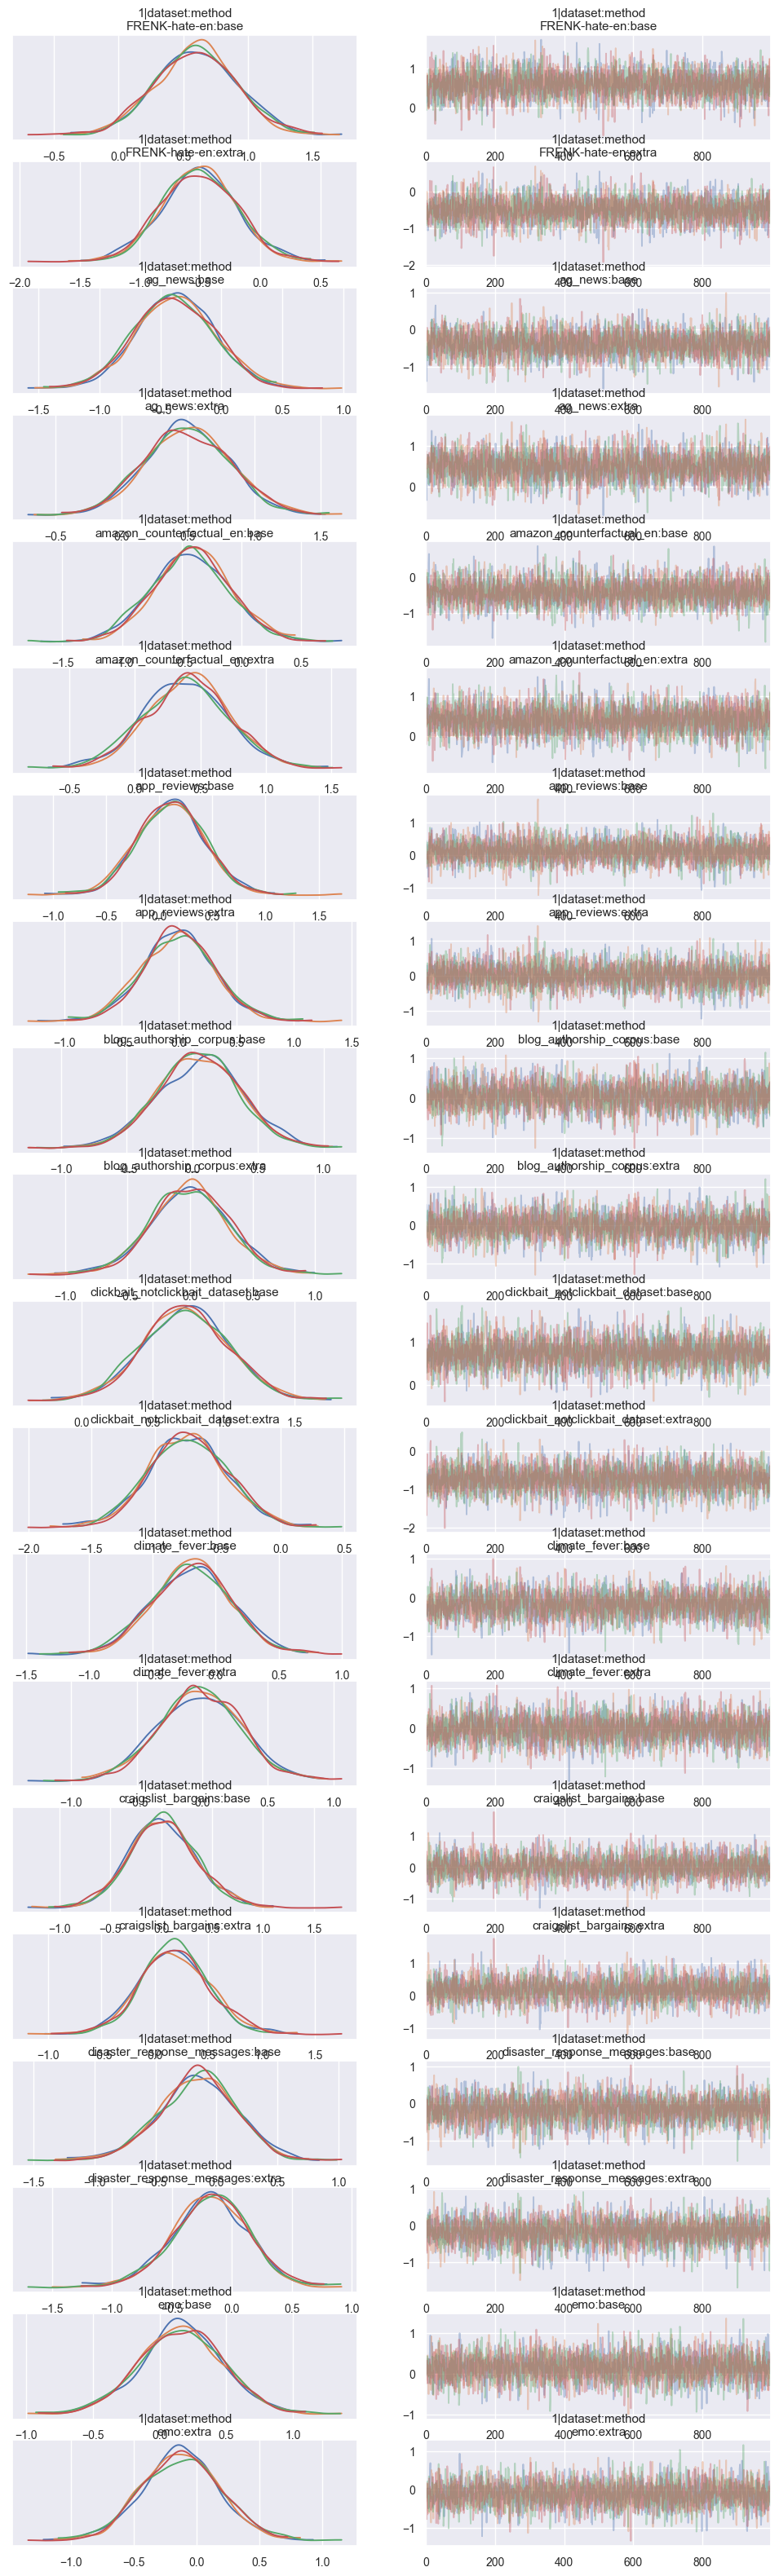

In [11]:
model_boost, summary_boost, az_summary_boost = utils.fit_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [12]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [13]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ -0.00044 ┆ 0.004023 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.036866 ┆ 0.019568 │
└──────────┴──────────┘


In [14]:
with pl.Config(tbl_rows=-1):
    print(summary_bias)

┌────────────────────────────────┬─────────────┬──────────┐
│ dataset                        ┆ mean        ┆ se       │
╞════════════════════════════════╪═════════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.0255     ┆ 0.012596 │
│ ag_news                        ┆ -0.0555     ┆ 0.025644 │
│ amazon_counterfactual_en       ┆ -0.026      ┆ 0.076411 │
│ app_reviews                    ┆ 0.0045      ┆ 0.005642 │
│ blog_authorship_corpus         ┆ 0.0075      ┆ 0.017931 │
│ clickbait_notclickbait_dataset ┆ -0.002      ┆ 0.001717 │
│ climate_fever                  ┆ 0.015       ┆ 0.015803 │
│ craigslist_bargains            ┆ 0.0305      ┆ 0.014876 │
│ disaster_response_messages     ┆ 0.026       ┆ 0.019213 │
│ emo                            ┆ 0.0305      ┆ 0.041087 │
│ emotion                        ┆ -0.008      ┆ 0.008633 │
│ enron_spam                     ┆ -2.7756e-18 ┆ 0.002616 │
│ financial_phrasebank           ┆ 0.012       ┆ 0.006391 │
│ hyperpartisan_news_detection   ┆ 0.005

In [15]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_bias)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.040048 ┆ 0.020798 │
│ ag_news                        ┆ -0.064952 ┆ 0.034442 │
│ amazon_counterfactual_en       ┆ 0.153956  ┆ 0.187355 │
│ app_reviews                    ┆ 0.006456  ┆ 0.008522 │
│ blog_authorship_corpus         ┆ 0.019368  ┆ 0.030214 │
│ clickbait_notclickbait_dataset ┆ -0.006327 ┆ 0.005195 │
│ climate_fever                  ┆ 0.090481  ┆ 0.067721 │
│ craigslist_bargains            ┆ 0.040275  ┆ 0.018525 │
│ disaster_response_messages     ┆ 0.413586  ┆ 0.207271 │
│ emo                            ┆ 0.098027  ┆ 0.078203 │
│ emotion                        ┆ -0.014089 ┆ 0.0173   │
│ enron_spam                     ┆ 0.001101  ┆ 0.00525  │
│ financial_phrasebank           ┆ 0.018389  ┆ 0.009442 │
│ hyperpartisan_news_detection   ┆ 0.018039  ┆ 0.026346 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 153 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],0.03210,0.05210,-0.05096,0.11474,0.00080,0.00071,4311.33088,3238.91501,1.00003
1|dataset:method[FRENK-hate-en:test],-0.03113,0.05007,-0.11296,0.04537,0.00077,0.00070,4255.80033,2728.45984,0.99983
1|dataset:method[ag_news:extra],0.08440,0.05734,-0.00807,0.17021,0.00094,0.00070,3600.60427,2890.86030,1.00274
1|dataset:method[ag_news:test],-0.08125,0.05697,-0.17388,0.00273,0.00090,0.00071,3963.71796,3125.34485,1.00071
1|dataset:method[amazon_counterfactual_en:extra],0.03424,0.05103,-0.04065,0.11860,0.00075,0.00074,4816.74849,2876.27271,1.00000
1|dataset:method[amazon_counterfactual_en:test],-0.03333,0.05141,-0.11319,0.04730,0.00073,0.00068,4986.50731,2995.35340,1.00037
1|dataset:method[app_reviews:extra],-0.00268,0.05266,-0.08655,0.07621,0.00078,0.00083,4589.97976,3067.35945,1.00214
1|dataset:method[app_reviews:test],0.00542,0.05115,-0.08480,0.07855,0.00077,0.00085,4274.57655,2834.49751,1.00125
1|dataset:method[blog_authorship_corpus:extra],-0.00858,0.05128,-0.08988,0.07111,0.00071,0.00075,5226.27939,3088.24917,1.00137
1|dataset:method[blog_authorship_corpus:test],0.00632,0.05067,-0.07117,0.08731,0.00072,0.00073,5008.91198,3220.30801,1.00009


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


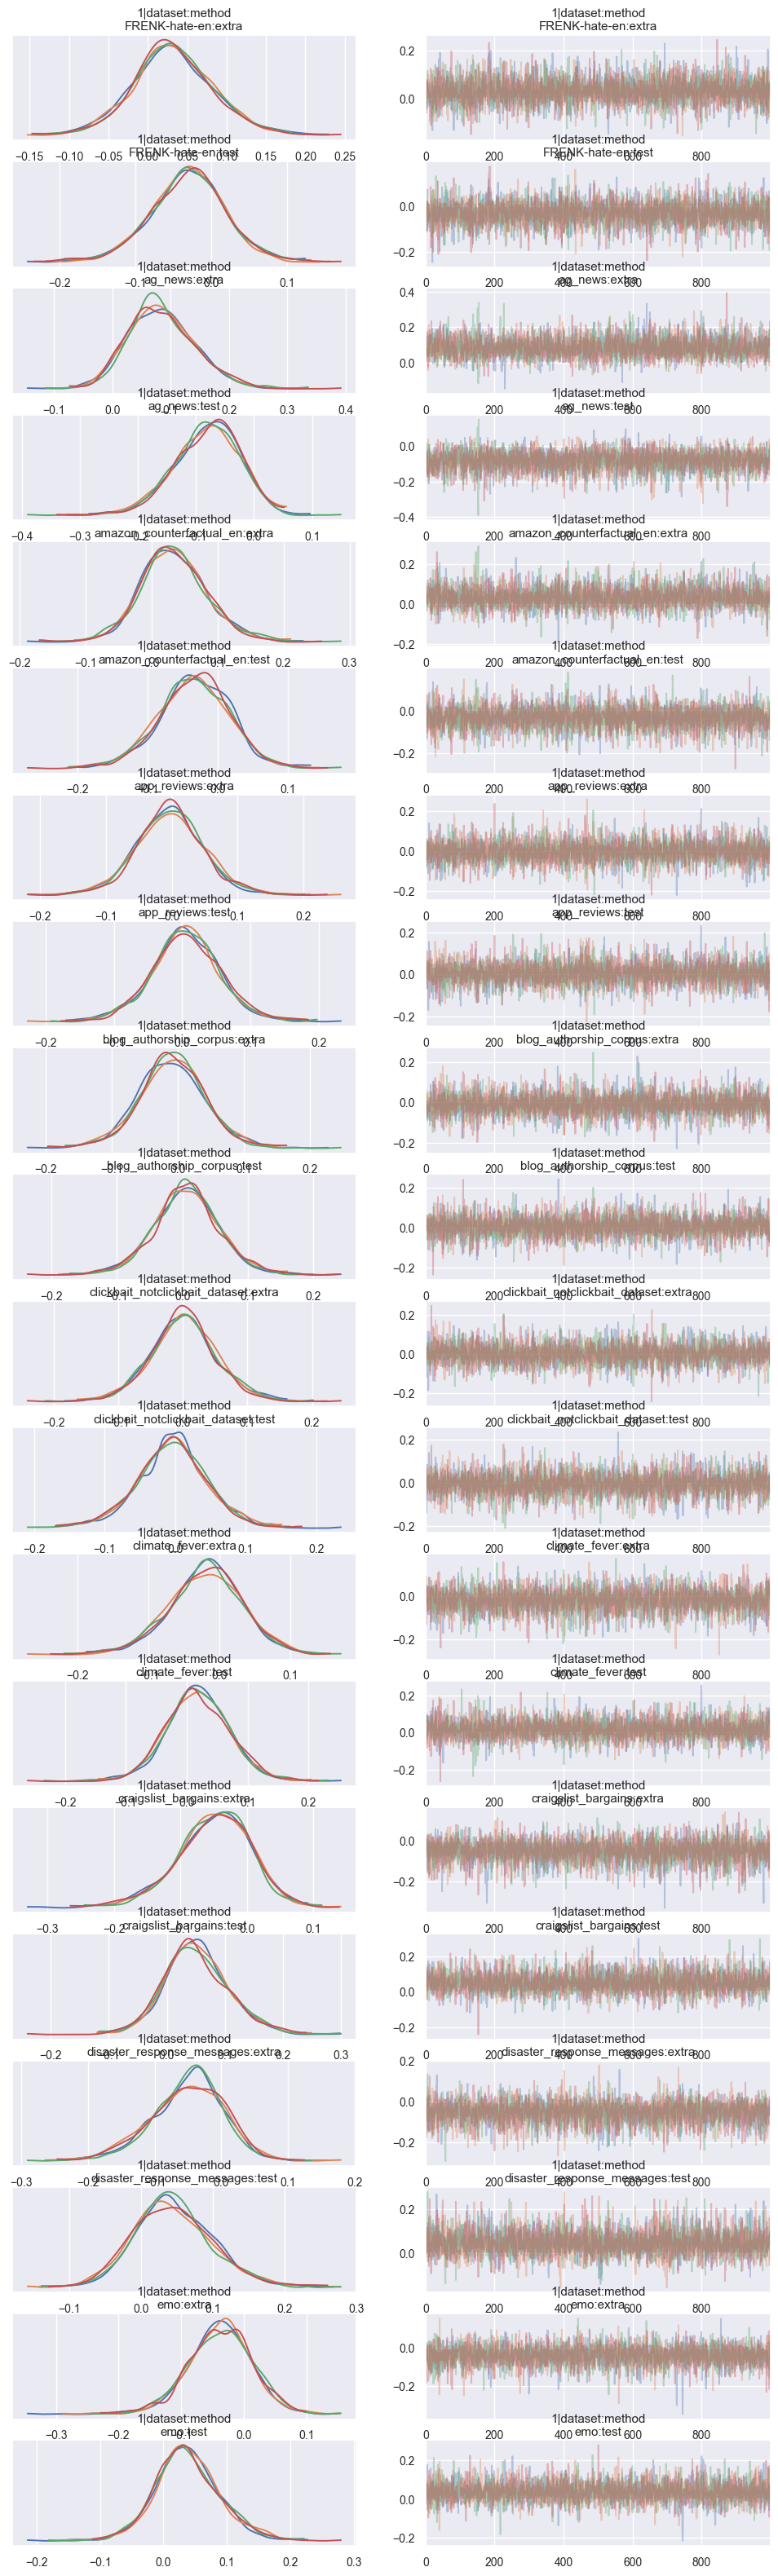

In [16]:
model_bias, summary_bias, az_summary_bias = utils.fit_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [17]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [18]:
netcdfs = os.path.join("..", "..", "netcdfs", "zero-shot", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [19]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/zero-shot/m100/main_m100_n100_boost.nc'

In [20]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/zero-shot/m100/main_m100_n100_bias.nc'